In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import scipy
import statsmodels.api as s
from sklearn import metrics

import pdb

In [2]:
sub_list = ['AC_newepoch','AM', 'BB','CM','CR','GG','HA','IB','JM','JR','KK','KT','MC','MH','NF','SB','SG','SOG','TL','ZZ']
data_dir = f'/lab_data/behrmannlab/vlad/pepdoc/results_ex1' #read in the file; first value is the file name
curr_dir = f'/user_data/vayzenbe/GitHub_Repos/pepdoc' #CHANGE AS NEEEDED CAUSE ITS FOR VLAAAD
fig_dir = f'{curr_dir}/figures' #where to save the figures
results_dir = f'{curr_dir}/results' #where to save the results

# bin_size = 1 
categories = ['tool','nontool','bird','insect']
labels = np.asanyarray([0]*5 + [1]*5 + [2]*5 + [3]*5) #creates labels for data



pre_stim = 50 #ms before stim onset
stim_end = 300 #ms when stim goes off
post_stim = 500 #ms after stim offset
bin_length = 4 #length of each bin in ms
bin_size = 1 #how many bins were averaged over; 1 = no averaging; 5 = average over 20 ms

#calculate start window for analysis given the bin size and length
start_window = pre_stim - (bin_length*(bin_size-1)) 
#calculate the onset point of the stimulus in the dataframe given the start window and bin length
stim_onset = int(start_window/bin_length)+1 
stim_offset = int(stim_end/bin_length)+stim_onset-1
timepoints = list(range(-start_window, post_stim, bin_length)) #134 20 ms bins


#### ERP Plots

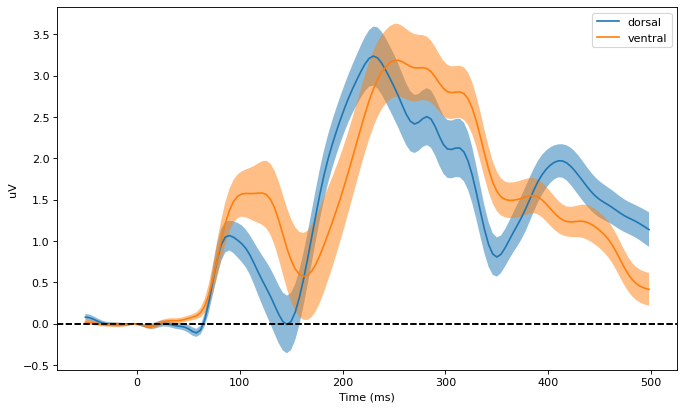

In [4]:
'''
Plot ERPs for each ROI with shading
'''
rois = ['dorsal','ventral']
#rois = ['dorsal']

plt.figure(figsize=(10, 6), dpi=80)
for roi in rois:
    roi_erp = np.load(f'{results_dir}/erp/{roi}_mean_ts.npy')
    if roi == 'control':
        roi_erp = roi_erp *-1
    pre_stim = roi_erp[:,:stim_onset]
    roi_mean = np.mean(roi_erp, axis=0)
    
    sem = np.std(roi_erp, ddof=1, axis =0) / np.sqrt(roi_erp.shape[0])

    plt.plot(timepoints, roi_mean, label=roi) #...plot the data, add error bars to mat plot lib, use standard error of the mean to add., there is a package called psypy to do this (psyplot - SEM)
    plt.axhline(y=0, color='k', linestyle='--')
    
    plt.fill_between(timepoints, roi_mean-sem, roi_mean+sem,alpha=0.5)
    plt.legend()

    plt.xlabel('Time (ms)')
    plt.ylabel('uV')
    

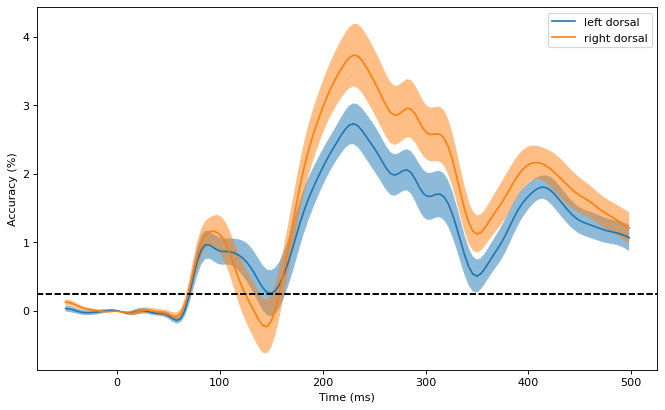

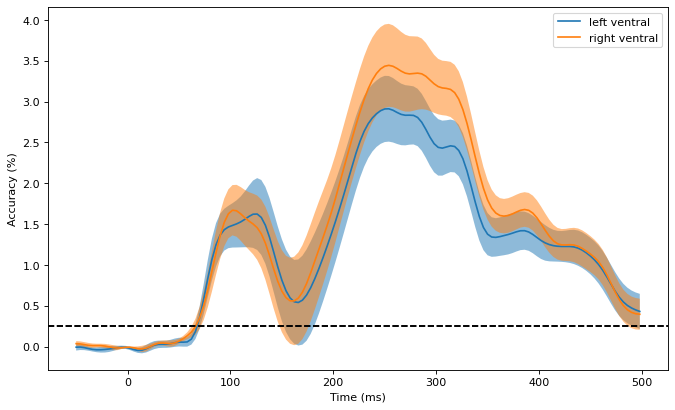

In [8]:
'''
Plot ERP  split by hemi
''' 
rois = ['dorsal','ventral']

for roi in rois:
    plt.figure(figsize=(10, 6), dpi=80)
    for lr in ['left','right']:
        roi_erp = np.load(f'{results_dir}/erp/{lr}_{roi}_mean_ts.npy')
        roi_mean = np.mean(roi_erp, axis=0)
        
        sem = np.std(roi_erp, ddof=1, axis =0) / np.sqrt(roi_erp.shape[0])

        plt.plot(timepoints, roi_mean, label=f'{lr} {roi}') #...plot the data, add error bars to mat plot lib, use standard error of the mean to add., there is a package called psypy to do this (psyplot - SEM)
        plt.axhline(y=0.25, color='k', linestyle='--')
        #plt.axhline(y=0.2215, color='k', linestyle='--')
        plt.fill_between(timepoints, roi_mean-sem, roi_mean+sem,alpha=0.5)
        plt.legend()

        plt.xlabel('Time (ms)')
        plt.ylabel('Accuracy (%)')
    plt.show()

#### Main decoding plots

In [ ]:
"""
Calc bootstrap CIs
"""

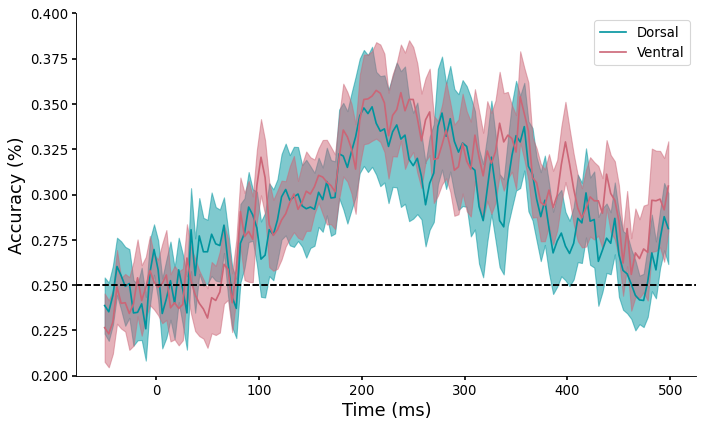

In [46]:
'''
Plot decodeing accuracy for each ROI with shading
'''
rois = ['ventral', 'dorsal']
roi_names = ['Ventral', 'Dorsal']
colors = ['#CC6677','#00949e']

rois = ['dorsal', 'ventral']
colors = ['#00949e','#CC6677']
onsets = [66,82]



plt.figure(figsize=(10, 6), dpi=80)
for roi in enumerate(rois):
    roi_decoding = np.load(f'{results_dir}/decode/{roi[1]}_decoding.npy')
    roi_mean = np.mean(roi_decoding, axis=0)
    
    sem = np.std(roi_decoding, ddof=1, axis =0) / np.sqrt(roi_decoding.shape[0])

    plt.plot(timepoints, roi_mean, label=roi[1].capitalize(), color = colors[roi[0]]) #...plot the data, add error bars to mat plot lib, use standard error of the mean to add., there is a package called psypy to do this (psyplot - SEM)
    plt.axhline(y=0.25, color='k', linestyle='--')
    
    #plt.axhline(y=0.2215, color='k', linestyle='--')
    plt.fill_between(timepoints, roi_mean-sem, roi_mean+sem,alpha=0.5, color = colors[roi[0]])
    plt.legend(fontsize=12)

    plt.xlabel('Time (ms)',fontsize=16)
    plt.ylabel('Accuracy (%)',fontsize=16)
    #plt.axvline(onsets[roi[0]],  linestyle='--', color = colors[roi[0]])
    #plt.yticks(np.arange(min(x), max(x)+1, 1.0))
    plt.xticks(fontsize= 12)
    plt.yticks(fontsize= 12)
    plt.ylim(.2,.4)

    ax = plt.gca()
    ax.xaxis.set_tick_params(width=1.5)
    ax.yaxis.set_tick_params(width=1.5)

    #start, end = ax.get_ylim()
    #ax.yaxis.set_ticks(np.arange(start, end, .05))

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    #plt.show()
    
    plt.savefig(f'{fig_dir}/decoding_plot.png', dpi=300)


In [67]:
roi_decoding = np.load(f'{results_dir}/decode/dorsal_decoding.npy')
roi_mean = np.mean(roi_decoding, axis=0)
    
np.max(roi_mean)

0.3484375

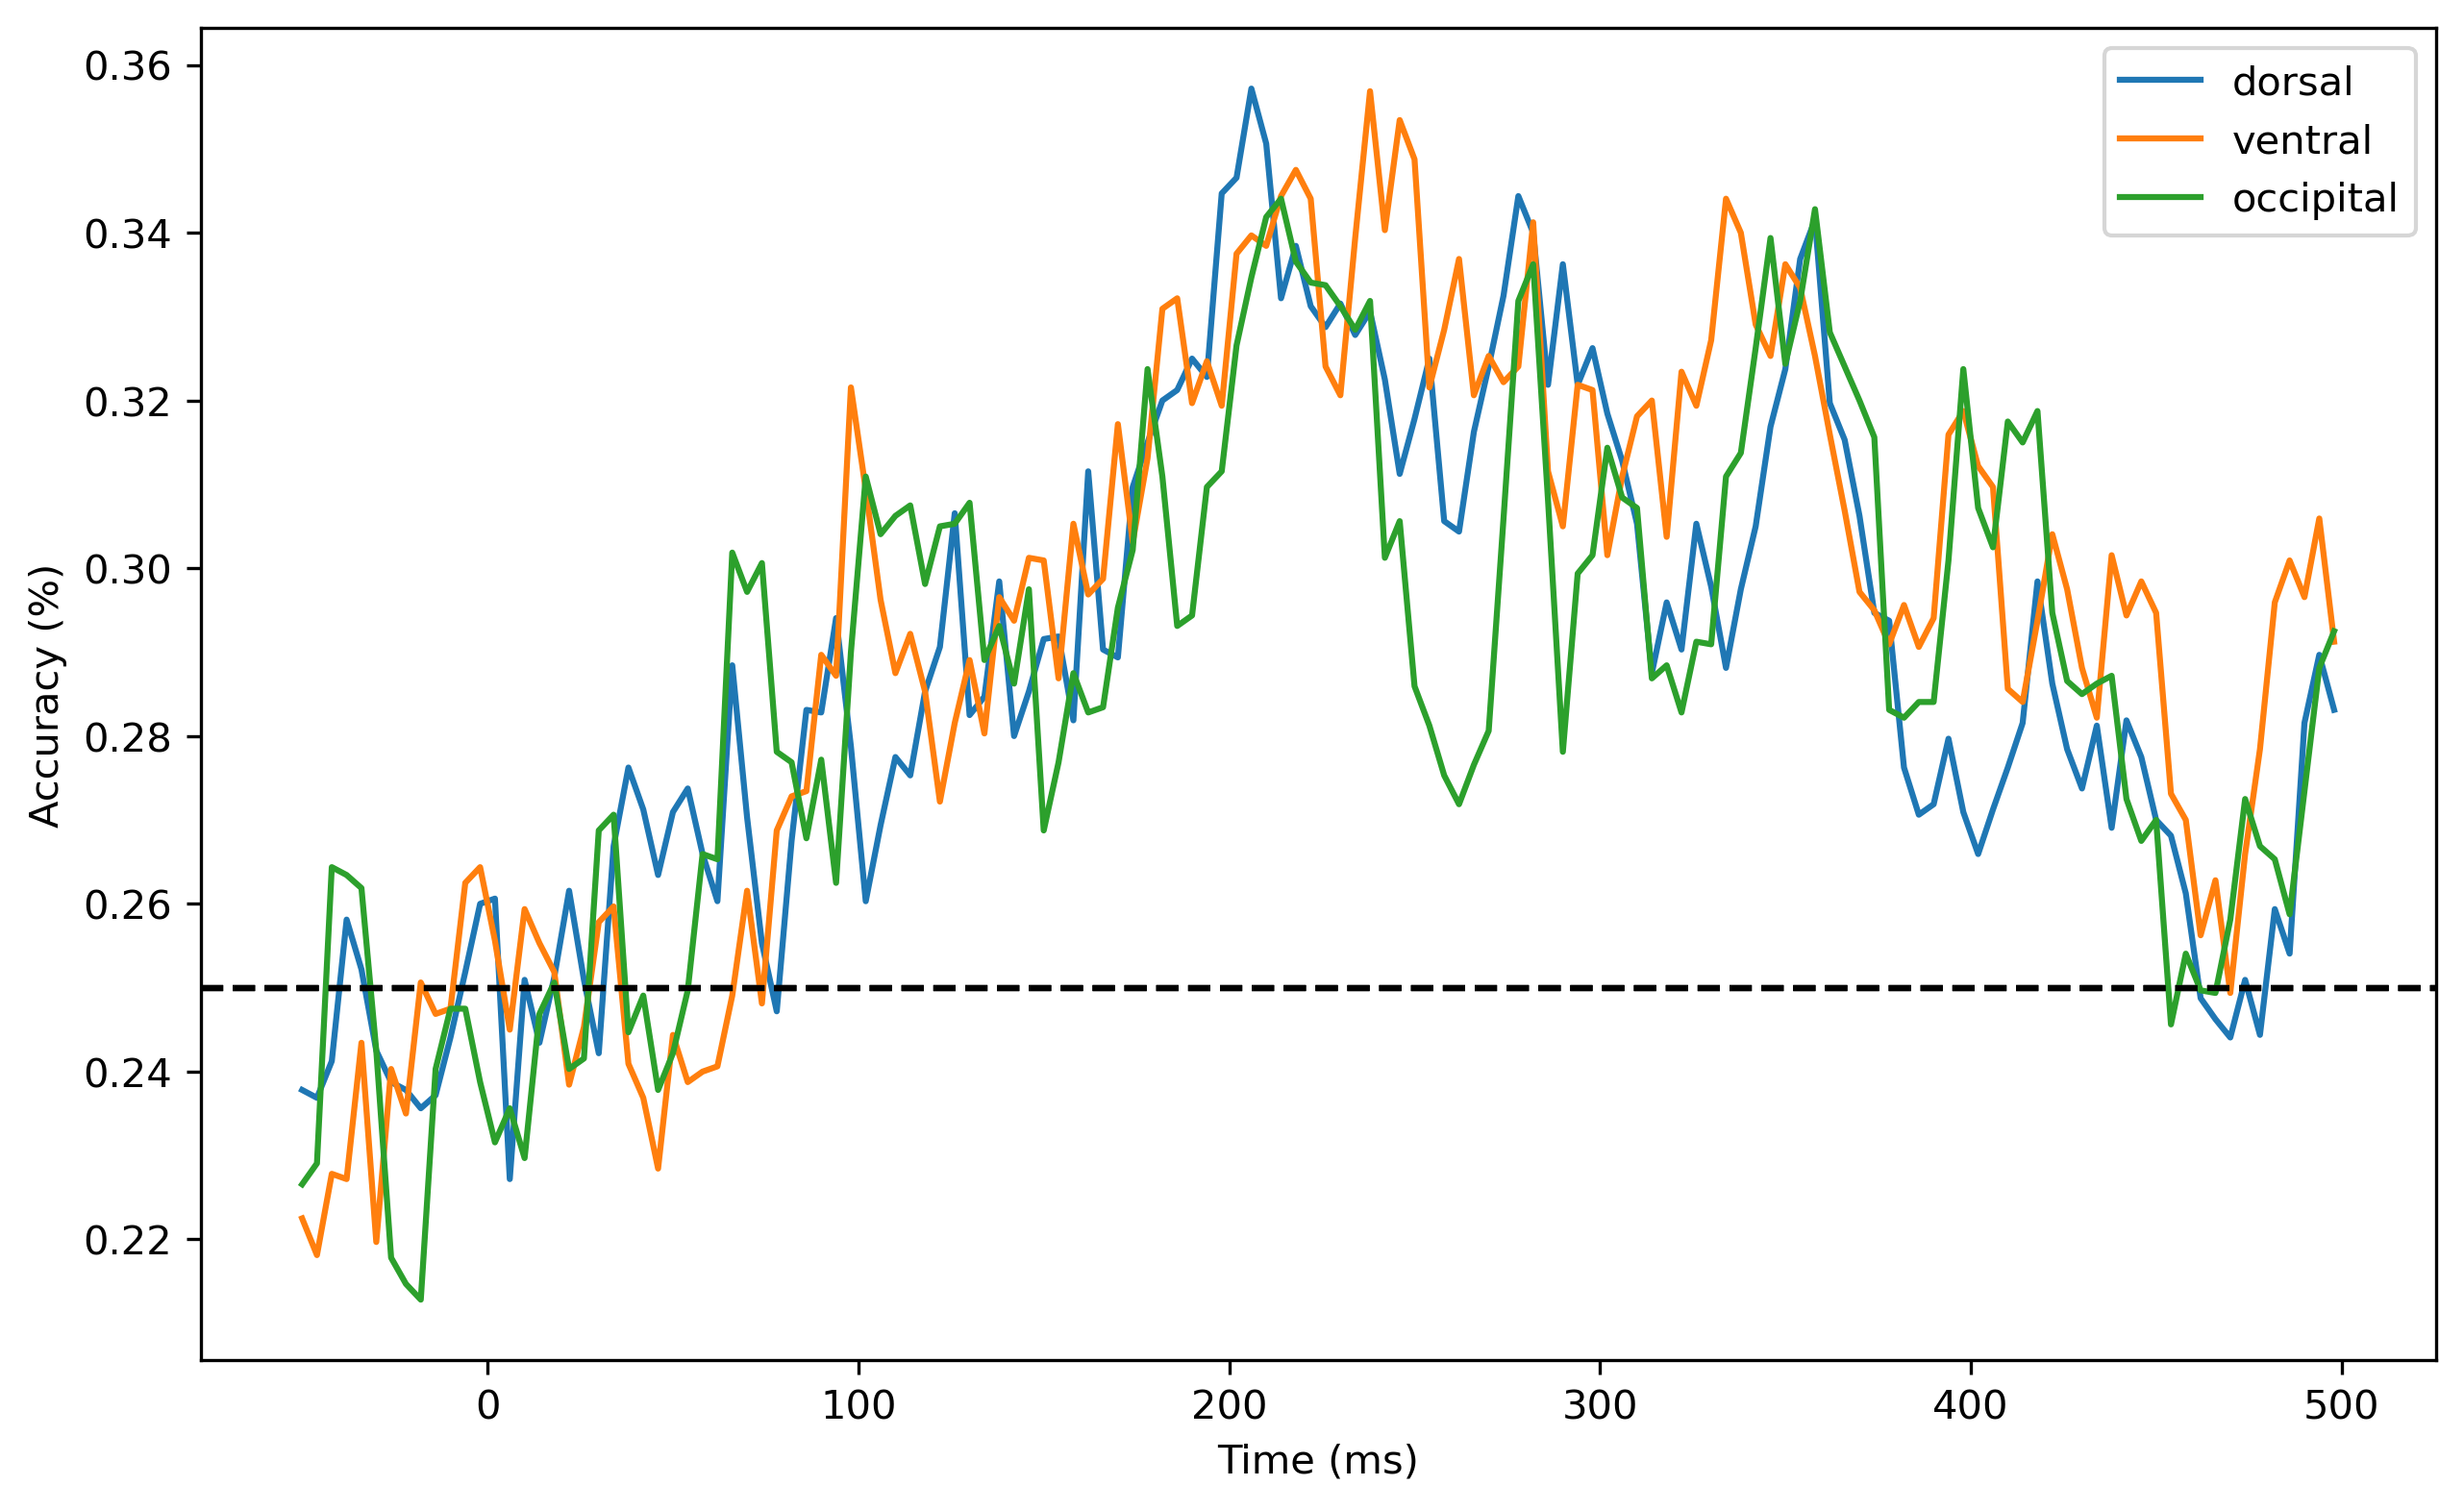

In [6]:
'''
Plot decodeing accuracy for each ROI without shading
'''

rois = ['dorsal','ventral','occipital']
#rois = ['dorsal']

plt.figure(figsize=(10, 6), dpi=300)
for roi in rois:
    roi_decoding = np.load(f'{results_dir}/{roi}_decoding.npy')
    roi_mean = np.mean(roi_decoding, axis=0)
    
    sem = np.std(roi_decoding, ddof=1, axis =0) / np.sqrt(roi_decoding.shape[0])

    plt.plot(timepoints, roi_mean, label=roi) #...plot the data, add error bars to mat plot lib, use standard error of the mean to add., there is a package called psypy to do this (psyplot - SEM)
    plt.axhline(y=0.25, color='k', linestyle='--')
    #plt.axhline(y=0.2215, color='k', linestyle='--')
    
    plt.legend()

    plt.xlabel('Time (ms)')
    plt.ylabel('Accuracy (%)')

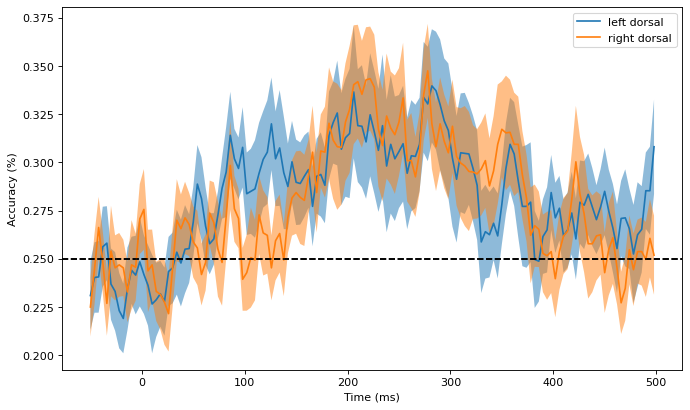

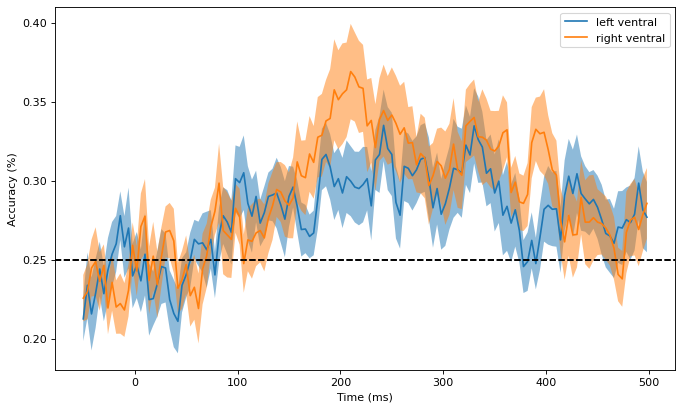

In [106]:
'''
Plot decoding accuracy split by hemi
''' 
rois = ['dorsal','ventral']

for roi in rois:
    plt.figure(figsize=(10, 6), dpi=80)
    for lr in ['left','right']:
        roi_decoding = np.load(f'{results_dir}/decode/{lr}_{roi}_decoding.npy')
        roi_mean = np.mean(roi_decoding, axis=0)
        
        sem = np.std(roi_decoding, ddof=1, axis =0) / np.sqrt(roi_decoding.shape[0])

        plt.plot(timepoints, roi_mean, label=f'{lr} {roi}') #...plot the data, add error bars to mat plot lib, use standard error of the mean to add., there is a package called psypy to do this (psyplot - SEM)
        plt.axhline(y=0.25, color='k', linestyle='--')
        #plt.axhline(y=0.2215, color='k', linestyle='--')
        plt.fill_between(timepoints, roi_mean-sem, roi_mean+sem,alpha=0.5)
        plt.legend()

        plt.xlabel('Time (ms)')
        plt.ylabel('Accuracy (%)')
    plt.show()

#### Significance across time

In [8]:
#dorsal
rois = ['dorsal','ventral','occipital','frontal']
for roi in rois:
    decoding_data = np.load(f'{results_dir}/decode/{roi}_decoding.npy')
    sig_ts = []
    for time in range(0, decoding_data.shape[1]):
        p_val = stats.ttest_1samp((decoding_data[:,time]), .25, axis = 0, alternative='greater')
        sig_ts.append(p_val[1])

    np.save(f'{results_dir}/decode/{roi}_sig_ts.npy', sig_ts)

(0, 'occipital') 66
(1, 'ventral') 98


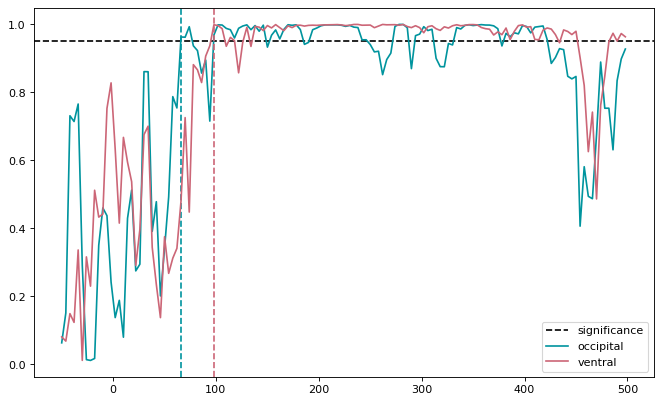

In [13]:
'''
Plot significance time series
'''

rois = ['occipital', 'ventral']
line_color = ['#00949e','#CC6677','green','orange']
alpha_level = .95
plt.figure(figsize=(10, 6), dpi=80)
plt.axhline(alpha_level, color = 'k', label='significance', linestyle='--')
for roi in enumerate(rois):
    sig_data = 1-np.load(f'{results_dir}/decode/{roi[1]}_sig_ts.npy')
    onset = np.min(np.where(sig_data >= alpha_level))
    onset = (onset *bin_length)-start_window
    plt.plot(timepoints, sig_data, label = roi[1], color = line_color[roi[0]])
    plt.axvline(onset,  linestyle='--', color = line_color[roi[0]])
    plt.legend()
    print(roi, onset)





#### Test significant onset

In [109]:
'''
Calculate onsets for each subject
''' 
alpha_level = .95
rois = ['dorsal','ventral','control']
sub_df = pd.DataFrame()
for roi in rois:
    decoding_sig = np.load(f'{results_dir}/decode/{roi}_decoding_sig.npy')
    decoding_sig = decoding_sig[:,stim_onset:]
    roi_onset = []
    for sub in range(0, decoding_sig.shape[0]):
        sig_times = np.where(decoding_sig[sub,:] <= 1-alpha_level)[0]

        for st in range(0, len(sig_times)):
            if st >0:
                if sig_times[st] - sig_times[st-1] == 1:
                    onset = sig_times[st-1]
                    break

        onset = (onset *bin_length)+4
        roi_onset.append(onset) 
    
    sub_df[roi] = roi_onset
    sub_df.to_csv(f'{results_dir}/onsets/{roi}_sub_onsets.csv')

In [110]:
'''
Run binomial test on subjects
'''

comparisons = [['dorsal','ventral'] ]

for roi in comparisons:
    #Calcualte the time  difference for each bootstrap between roi pairs
    diff = sub_df[roi[0]] - sub_df[roi[1]]

    #count the number of times the first roi precedes the other
    time_count = np.sum(diff < 0)

    print(stats.binom_test(time_count,n=len(diff), p= 0.5, alternative='two-sided'))
    



0.5034446716308594


In [48]:
'''
Boot strap participant data and extract onset
'''

rois = ['dorsal','ventral']
iter = 1000

boot_df = pd.DataFrame()
for roi in rois:
    decoding_data = np.load(f'{results_dir}/decode/{roi}_decoding.npy')
    decoding_data = decoding_data[:,stim_onset:]
    decoding_data = pd.DataFrame(decoding_data) #convert to dataframe because it has a good resampling function
    decode_boot = []
    sub_counts = np.zeros((1,decoding_data.shape[1]))

    for ii in range(0,iter):
        
        #resample the sub decode data with replacement
        sub_sample = decoding_data.sample(decoding_data.shape[0],replace = True, random_state=ii)
        
        #convert it back to a numpy array
        sub_sample = sub_sample.to_numpy() 
        
        #calculate the bootstrap sample mean
        sig_boot = []
        
        #only add values if they are significant two timepoints in arow
        sig_consistent = []
        
        sig_ts = []
        for time in range(0,sub_sample.shape[1]):
            p_val= stats.ttest_1samp(sub_sample[:,time], .25, axis = 0, alternative='greater')
            
            #append the p-value for every time point
            sig_ts.append(p_val[1])  


            #mark timepoints that are above chance for at least two timepoints in a row
            if time > 0:

                if sig_ts[time] <= .05 and sig_ts[time-1] <=.05:
                    sig_consistent.append(1)
                else:
                    sig_consistent.append(0)

        #reconvert p-value list into a numpy array
        sig_ts = np.asanyarray(sig_ts)

        #reconvert consistent list into a numpy array
        sig_consistent = np.asanyarray(sig_consistent)
            
        #find the the first time point that is below change (0.05)
        #np.where simply returns the indices (i.e., spots in an array), that meet some condition
        #i'm simply grabbing the first value of that list, which corresponds to the first time point above chance
        try:
            sig_onset = np.where(sig_consistent ==1,)[0][0]
        except:
            sig_onset= decoding_data.shape[1]
        
        
        
        sub_counts[0,np.where(sig_ts <=.05)[0]] += 1
        
        #if d_onset == 1:
        #    pdb.set_trace()
        
        #convert to the actual time point
        sig_onset = (sig_onset *4)

        #add the onset value from the resample to a list
        decode_boot.append(sig_onset)
    
    boot_df[roi] = decode_boot

boot_df.to_csv(f'{results_dir}/onsets/onset_boot_df.csv')

In [63]:
'''
Run binomial test on bootstrapped data
'''

comparisons = [['dorsal','ventral'] ]

for roi in comparisons:
    #Calcualte the time  difference for each bootstrap between roi pairs
    diff = boot_df[roi[0]] - boot_df[roi[1]]

    #count the number of times the first roi precedes the other
    time_count = np.sum(diff < 0)

    print(stats.binom_test(time_count,n=len(diff), p= 0.5, alternative='two-sided'))
    print(time_count)



5.249291116750507e-27
669


In [64]:
669/1000

0.669

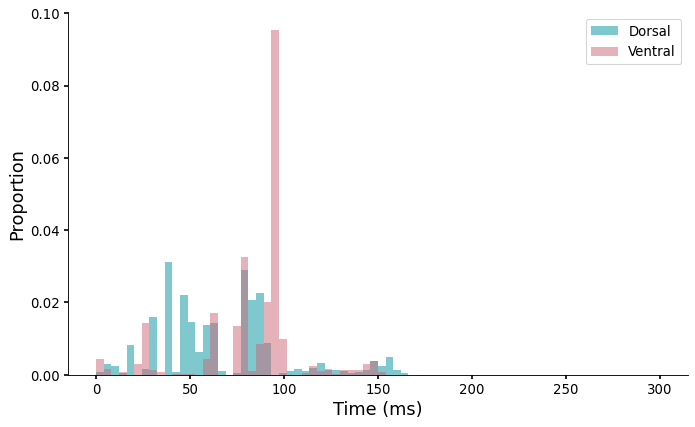

In [58]:
colors = ['#00949e','#CC6677']
plt.figure(figsize=(10, 6), dpi=80)
plt.hist(boot_df['dorsal'], range = [0, 300], label='Dorsal', color=colors[0], alpha=.5, bins= 74, density=True)
plt.hist(boot_df['ventral'],range = [0, 300], label='Ventral', color=colors[1], alpha=.5, bins= 74, density=True)
#plt.hist(c_boot,range = [0, 150], label='control', color='g', alpha=.5, bins= 150, density=True)


plt.ylabel('Proportion')
plt.legend(loc='upper right')

plt.legend(fontsize=12)

plt.xlabel('Time (ms)',fontsize=16)
plt.ylabel('Proportion',fontsize=16)
#plt.axvline(onsets[roi[0]],  linestyle='--', color = colors[roi[0]])
#plt.yticks(np.arange(min(x), max(x)+1, 1.0))
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)


ax = plt.gca()
ax.xaxis.set_tick_params(width=1.5)
ax.yaxis.set_tick_params(width=1.5)

#start, end = ax.get_ylim()
#ax.yaxis.set_ticks(np.arange(start, end, .05))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig(f'{fig_dir}/onset_histogram.png', dpi=300)

In [65]:
np.mean(diff)

-15.952

In [61]:
#plot the difference values with confidence intervals
alpha = .05
ci_low = np.percentile(diff, alpha*100)
ci_high= np.percentile(diff, 100-alpha*100)
print(ci_low,ci_high)

-68.0 56.0


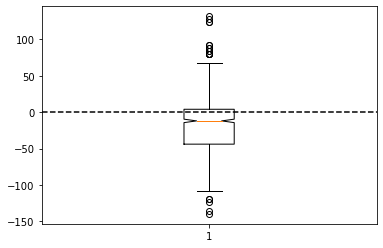

In [60]:
plt.boxplot(diff,notch=True)
plt.axhline(0, color = 'k', label='significant', linestyle='--')

#### Calculate summary stats

In [43]:
'''
AUC for each subject
'''

rois = ['dorsal','ventral','control', 'left_dorsal', 'right_dorsal', 'left_ventral', 'right_ventral']

sub_df = pd.DataFrame()
for roi in rois:
    decoding_data = np.load(f'{results_dir}/{roi}_decoding.npy')
    decoding_data = decoding_data[:,stim_onset:]
    roi_data=[]
    for sub_n in range(0, decoding_data.shape[0]):
        
        roi_data.append(metrics.auc(np.arange(0,decoding_data.shape[1]), decoding_data[sub_n,:]))

    sub_df[roi] = roi_data





Text(0, 0.5, 'AUC')

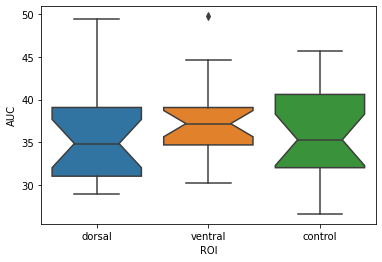

In [51]:
sns.boxplot(data=sub_df[['dorsal','ventral','control']], notch= True)
plt.xlabel('ROI')
plt.ylabel('AUC')

#### Granger causality

In [25]:
roi_data1 = np.load(f'{results_dir}/decode/dorsal_decoding.npy')
roi_data1.shape

(20, 138)

In [47]:
'''
Univariate GCA on decoding
'''

import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

max_lag = 4

comparisons = [['dorsal','ventral']]
for roi in comparisons:
    roi_fs = []
    
    roi_data1 = np.load(f'{results_dir}/decode/{roi[0]}_decoding.npy')
    roi_data2 = np.load(f'{results_dir}/decode/{roi[1]}_decoding.npy')

    roi_data1 = roi_data1[:,stim_onset:stim_offset]
    roi_data2 = roi_data2[:,stim_onset:stim_offset]
    for sub in range(0,len(sub_list)):
        roi_df = pd.DataFrame()


        roi_df[roi[0]] = roi_data1[sub,:]
        roi_df[roi[1]] =  roi_data2[sub,:]

        roi_df = roi_df.apply(stats.zscore)


        #df = df.diff().dropna()

        gc_1 = grangercausalitytests(roi_df[[roi[0],roi[1]]], maxlag=[max_lag])
        gc_2 = grangercausalitytests(roi_df[[roi[1],roi[0]]], maxlag=[max_lag])

        '''
        roi1_f = []
        roi2_f = []
        for gcn in range(1,len(gc_1)):
            roi1_f.append(gc_1[gcn][0]['ssr_ftest'][0])
            roi2_f.append(gc_2[gcn][0]['ssr_ftest'][0])

        max_roi_1 = np.max(roi1_f)
        max_roi_2 = np.max(roi2_f)
        '''
        roi1_f = gc_1[max_lag][0]['ssr_ftest'][0]
        roi2_f = gc_2[max_lag][0]['ssr_ftest'][0]

        roi_fs.append(roi1_f - roi2_f)




Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.4437  , p=0.2305  , df_denom=61, df_num=4
ssr based chi2 test:   chi2=6.6267  , p=0.1570  , df=4
likelihood ratio test: chi2=6.3315  , p=0.1757  , df=4
parameter F test:         F=1.4437  , p=0.2305  , df_denom=61, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.2513  , p=0.9078  , df_denom=61, df_num=4
ssr based chi2 test:   chi2=1.1535  , p=0.8857  , df=4
likelihood ratio test: chi2=1.1441  , p=0.8872  , df=4
parameter F test:         F=0.2513  , p=0.9078  , df_denom=61, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.4961  , p=0.7386  , df_denom=61, df_num=4
ssr based chi2 test:   chi2=2.2771  , p=0.6849  , df=4
likelihood ratio test: chi2=2.2409  , p=0.6916  , df=4
parameter F test:         F=0.4961  , p=0.7386  , df_denom=61, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.5195  , p=0.7217  , df_d

#### Time generalized RSA analyses

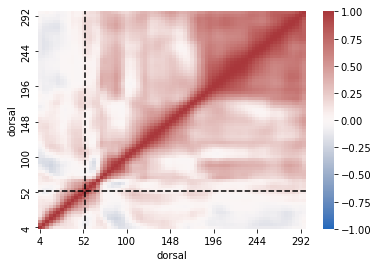

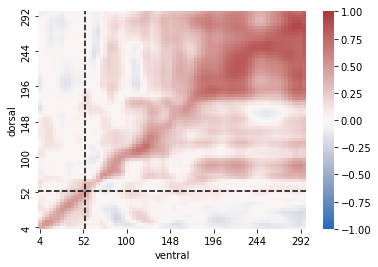

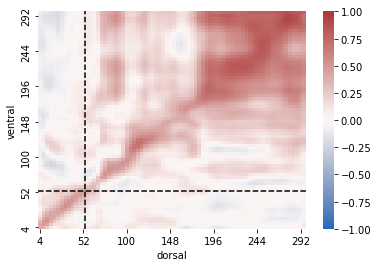

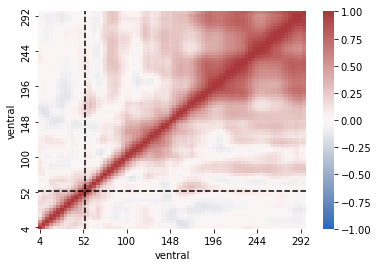

In [46]:
"""
Plot time generalization RDMs
"""

rois = ['dorsal','ventral']
#rois = ['dorsal']

#timepoints = np.asanyarray(timepoints)
time_cols = np.asanyarray(timepoints)
time_cols[1:] = time_cols[1:] + 2
for roi1 in rois:
    for roi2 in rois:
        corr_ts = np.load(f'{results_dir}/rsa/{roi1}_{roi2}_corr_ts.npy')
        
        corr_df = pd.DataFrame(corr_ts, columns = time_cols, index = time_cols)
        corr_df = corr_df.iloc[stim_onset:stim_offset,stim_onset:stim_offset]
        ax = sns.heatmap(corr_df,xticklabels=12,yticklabels=12, vmin = -1, vmax = 1, cmap= "vlag")
        #ax.set_title(f'{roi1} {roi2}')
        ax.invert_yaxis()
        plt.axvline(13,  linestyle='--', color = 'black')
        plt.axhline(13,  linestyle='--', color = 'black')
        plt.ylabel(roi1)
        plt.xlabel(roi2)
        plt.show()
        
    

In [47]:
"""
Test whether RDMs are right shifted or left shifted
"""
rois = ['dorsal','ventral','control']


#timepoints = np.asanyarray(timepoints)
time_cols = np.asanyarray(timepoints)
time_cols[1:] = time_cols[1:] + 2
df = pd.DataFrame()
for roi1 in rois:
    for roi2 in rois:
        if roi1 == roi2:
            continue
        else:
            corr_ts = np.load(f'{results_dir}/rsa/{roi1}_{roi2}_corr_ts.npy')
            corr_ts = corr_ts[stim_onset:stim_offset,stim_onset:stim_offset]

            #extract left and right sides of the diagnol
            inds = np.triu_indices(n=corr_ts.shape[0],k=1)
            right_side = corr_ts[inds] #extract lower triangle
            left_side = corr_ts[(inds[1],inds[0])] #extract upper triangle

            #calculate the difference between the left and right sides
            #if positive, then right shifted
            diff = right_side - left_side


            df[f'{roi1}_{roi2}'] = diff
            #left side rdm




In [45]:
(74*73)/2

2701.0

Text(0, 0.5, 'Time Diff')

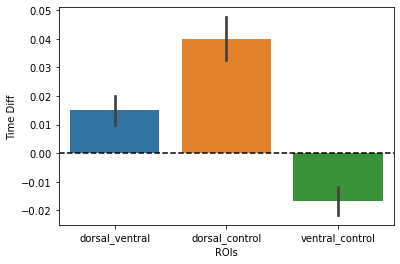

In [48]:
sns.barplot(data = df[['dorsal_ventral','dorsal_control','ventral_control']],n_boot=10000,)
plt.axhline(0, color = 'k', label='significant', linestyle='--')
plt.xlabel('ROIs')
plt.ylabel('Time Diff')

In [38]:
"""
Test whether RDMs are right shifted or left shifted
"""
rois = ['dorsal','ventral','control']

time_offset = 13
#timepoints = np.asanyarray(timepoints)
time_cols = np.asanyarray(timepoints)
time_cols[1:] = time_cols[1:] + 2
df = pd.DataFrame()
for roi1 in rois:
    for roi2 in rois:
        if roi1 == roi2:
            continue
        else:
            corr_ts = np.load(f'{results_dir}/rsa/{roi1}_{roi2}_corr_ts.npy')
            corr_ts = corr_ts[stim_onset:stim_offset,stim_onset:stim_offset]

            eye_mat = np.eye(corr_ts.shape[0],corr_ts.shape[1], k = 0)
            for t in range(1,time_offset):
                eye_mat = eye_mat+ np.eye(corr_ts.shape[0],corr_ts.shape[1], k = t)
                eye_mat = eye_mat+ np.eye(corr_ts.shape[0],corr_ts.shape[1], k = -t)

            corr_ts =corr_ts*eye_mat

            #extract left and right sides of the diagnol
            inds = np.triu_indices(n=corr_ts.shape[0],k=1)
            diaganol = corr_ts[np.triu_indices(n=corr_ts.shape[0],k=0)] #extract lower triangle
            right_side = corr_ts[inds] #extract lower triangle
            left_side = corr_ts[(inds[1],inds[0])] #extract upper triangle

            #remove zeros
            diaganol = diaganol[diaganol != 0]
            left_side = left_side[left_side != 0]
            right_side = right_side[right_side != 0]

            #calculate the difference between the left and right sides
            #if positive, then right shifted
            diff = right_side - left_side


            df[f'{roi1}_{roi2}'] = diff
    
            #left side rdm




In [34]:
(np.sum(eye_mat == 1) -74)/2

621.0

In [39]:
df.mean()

dorsal_ventral     0.013766
dorsal_control     0.013087
ventral_dorsal    -0.013766
ventral_control   -0.047894
control_dorsal    -0.013087
control_ventral    0.047894
dtype: float64

Text(0, 0.5, 'Time Diff')

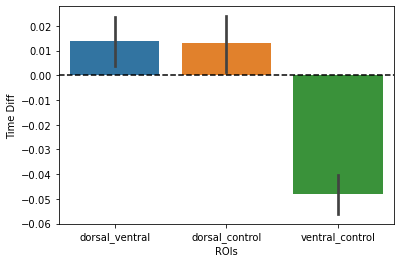

In [40]:
sns.barplot(data = df[['dorsal_ventral','dorsal_control','ventral_control']])
plt.axhline(0, color = 'k', label='significant', linestyle='--')
plt.xlabel('ROIs')
plt.ylabel('Time Diff')

In [42]:
(74*73)/2

2701.0

In [36]:
df.mean()

dorsal_ventral    -0.013959
dorsal_control    -0.037893
ventral_dorsal     0.013959
ventral_control    0.015562
control_dorsal     0.037893
control_ventral   -0.015562
dtype: float64

In [72]:
(74*73)/2

2701.0